In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

/var/folders/03/1q4yb6vs3n72l7m7q2jp5v640000gn/T/ipykernel_43487/1249037438.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


No: Seedling unique ID number.

Plot: Number of the field plot the seedling was planted in (1-18).

Subplot: Subplot within the main plot the seedling was planted in. Broken into 5 subplots (1 per corner, plus 1 in the middle) (A-E).

Species: Includes Acer saccharum, Prunus serotina, Quercus alba, and Quercus rubra.

Light ISF: Light level quantified with HemiView software. Represents the amount of light reaching each subplot at a height of 1m.

Light Cat: Categorical light level created by splitting the range of Light_ISF values into three bins (low, med, high).

Core: Year the soil core was removed from the field.

Soil: Species from which the soil core was taken. Includes all species, plus Acer rubrum, Populus grandidentata, and a sterilized 
conspecific for each species.

Adult: Individual tree that soil was taken from. Up to 6 adults per species. Used as a random effect in analyses.

Sterile: Whether the soil was sterilized or not.

Conspecific: Whether the soil was conspecific, heterospecific, or sterilized conspecific.

Myco: Mycorrhizal type of the seedling species (AMF or EMF).

SoilMyco: Mycorrhizal type of the species culturing the soil (AMF or EMF).

PlantDate: The date that seedlings were planted in the field pots.

AMF: Percent arbuscular mycorrhizal fungi colonization on the fine roots of harvested seedlings.

EMF: Percent ectomycorrhizal fungi colonization on the root tips of harvested seedlings.

Phenolics: Calculated as nmol Gallic acid equivalents per mg dry extract (see manuscript for detailed methods).

NSC: Calculated as percent dry mass nonstructural carbohydrates (see manuscript for detailed methods).

Lignin: Calculated as percent dry mass lignin (see manuscript for detailed methods).

Census: The census number at which time the seedling died or was harvested.

Time: The number of days at which time the seedling died or was harvested.

Event: Used for survival analysis to indicate status of each individual seedling at a given time (above)
0 = harvested or experiment ended
1 = dead

Harvest: Indicates whether the seedling was harvested for trait measurement.

Alive: Indicates if the seedling was alive at the end of the second growing season. "X" in this field indicates alive status.

In [3]:
def unique(lists):
    unique_list = pd.Series(lists).drop_duplicates().tolist()
    for x in unique_list:
        print(x)

In [4]:
tree = pd.read_csv('Tree_Data.csv')
tree = tree.drop('No', axis = 1)
pd.set_option('display.max_columns', None)
tree.head()

,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,0,Dead
1,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,Heterospecific,EMF,EMF,5/25/18,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,0,Alive
2,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,Heterospecific,EMF,AMF,5/31/18,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,0,Dead
3,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,0,Dead
4,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,0,Dead


In [5]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Plot         2783 non-null   int64  
 1   Subplot      2783 non-null   object 
 2   Species      2783 non-null   object 
 3   Light_ISF    2783 non-null   float64
 4   Light_Cat    2783 non-null   object 
 5   Core         2783 non-null   int64  
 6   Soil         2783 non-null   object 
 7   Adult        2783 non-null   object 
 8   Sterile      2783 non-null   object 
 9   Conspecific  2783 non-null   object 
 10  Myco         2783 non-null   object 
 11  SoilMyco     2783 non-null   object 
 12  PlantDate    2783 non-null   object 
 13  AMF          2783 non-null   float64
 14  EMF          1283 non-null   float64
 15  Phenolics    2783 non-null   float64
 16  Lignin       2783 non-null   float64
 17  NSC          2783 non-null   float64
 18  Census       2783 non-null   int64  
 19  Time  

In [6]:
#Interpolation: Use interpolation methods to estimate missing values based on the values of neighboring observations. 
#This method is suitable for time series or ordered data.
tree['EMF'] = tree['EMF'].interpolate(method = 'linear')

In [7]:
print(tree.isnull().sum())

Plot           0
Subplot        0
Species        0
Light_ISF      0
Light_Cat      0
Core           0
Soil           0
Adult          0
Sterile        0
Conspecific    0
Myco           0
SoilMyco       0
PlantDate      0
AMF            0
EMF            1
Phenolics      0
Lignin         0
NSC            0
Census         0
Time           0
Event          1
Harvest        0
Alive          0
dtype: int64


In [8]:
tree.describe()

,Plot,Light_ISF,Core,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest
count,2783.000000,2783.000000,2783.000000,2783.000000,2782.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2782.000000,2783.000000
mean,9.561624,0.085707,2016.648940,20.553069,26.948107,1.933105,15.759792,14.219641,15.282070,53.487244,0.570453,0.252964
std,5.203659,0.025638,0.477387,12.309587,13.694926,1.969842,6.779607,4.298271,9.166555,32.082942,0.495100,0.434789
min,1.000000,0.032000,2016.000000,0.000000,0.000000,-1.350000,2.230000,4.300000,4.000000,14.000000,0.000000,0.000000
25%,5.000000,0.066000,2016.000000,13.400000,18.563500,0.170000,10.355000,11.605000,7.000000,24.500000,0.000000,0.000000
50%,10.000000,0.082000,2017.000000,18.000000,27.900714,0.750000,14.040000,12.660000,13.000000,45.500000,1.000000,0.000000
75%,14.000000,0.100000,2017.000000,24.445000,35.084500,3.780000,21.115000,17.275000,18.000000,63.000000,1.000000,1.000000
max,18.000000,0.161000,2017.000000,100.000000,87.500000,6.100000,32.770000,29.450000,33.000000,115.500000,1.000000,1.000000


In [9]:
categorical_columns = tree.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Column: {column}")
    print(tree[column].value_counts())
    print()

Column: Subplot
Subplot
A    701
D    666
B    663
C    646
E    107
Name: count, dtype: int64

Column: Species
Species
Acer saccharum     751
Prunus serotina    749
Quercus alba       673
Quercus rubra      610
Name: count, dtype: int64

Column: Light_Cat
Light_Cat
Med     1474
Low     1005
High     304
Name: count, dtype: int64

Column: Soil
Soil
Sterile                  423
Prunus serotina          413
Quercus rubra            402
Acer saccharum           397
Populus grandidentata    391
Quercus alba             381
Acer rubrum              376
Name: count, dtype: int64

Column: Adult
Adult
I       90
984     90
J       89
689     89
H       88
275     88
970     88
921     88
1757    86
1478    85
1454    85
961     84
1297    83
1330    83
G       83
561     82
415     82
1205    81
1027    80
1715    80
1323    79
1688    78
1320    78
1595    77
118     69
277     68
1386    65
1201    65
1332    65
1468    64
394     64
50      63
891     63
285     62
1384    61
1326    58
Nam

In [10]:
for column1 in categorical_columns:
    for column2 in categorical_columns:
        if column1 != column2:
            print(pd.crosstab(tree[column1], tree[column2], margins = True))

Species  Acer saccharum  Prunus serotina  Quercus alba  Quercus rubra   All
Subplot                                                                    
A                   188              196           172            145   701
B                   178              175           160            150   663
C                   170              179           162            135   646
D                   194              171           151            150   666
E                    21               28            28             30   107
All                 751              749           673            610  2783
Light_Cat  High   Low   Med   All
Subplot                          
A            78   303   320   701
B            34   222   407   663
C           110   190   346   646
D            75   252   339   666
E             7    38    62   107
All         304  1005  1474  2783
Soil     Acer rubrum  Acer saccharum  Populus grandidentata  Prunus serotina  \
Subplot                                 

Adult    1027  118  1201  1205  1297  1320  1323  1326  1330  1332  1384  \
Subplot                                                                    
A          20   23    17    23    19    28    20    15    22    23    17   
B          24   13    13    14    21    18    13    16    23    11    15   
C          15   17    18    20    15    19    23    15    13    16    15   
D          18   14    14    18    22    11    20    11    22    13    12   
E           3    2     3     6     6     2     3     1     3     2     2   
All        80   69    65    81    83    78    79    58    83    65    61   

Adult    1386  1454  1468  1478  1595  1688  1715  1757  275  277  285  394  \
Subplot                                                                       
A          13    19    16    24    22    26    17    13   18   18   15   11   
B          14    17    18    14    18    15    19    28   31   20   12   18   
C          14    19    16    25    23    20    18    16   16    5   18   12

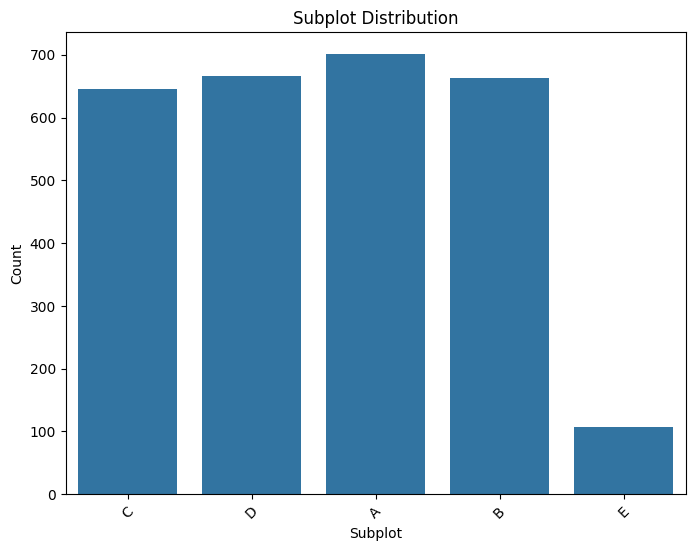

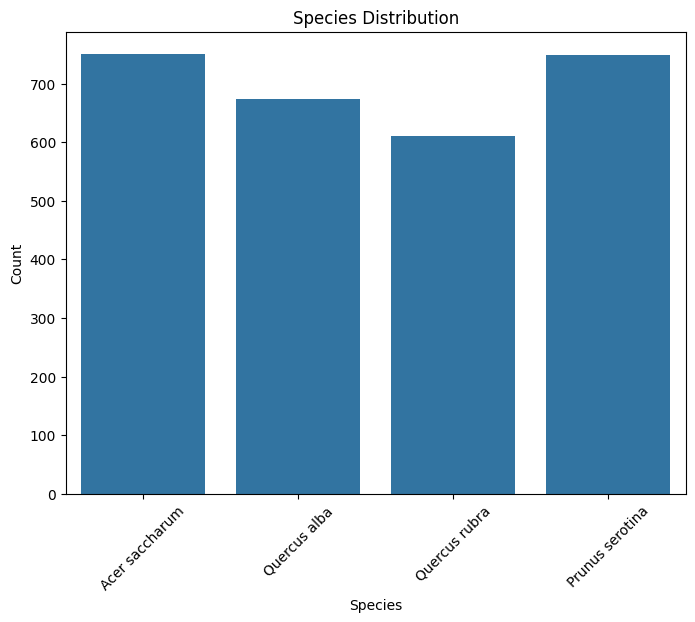

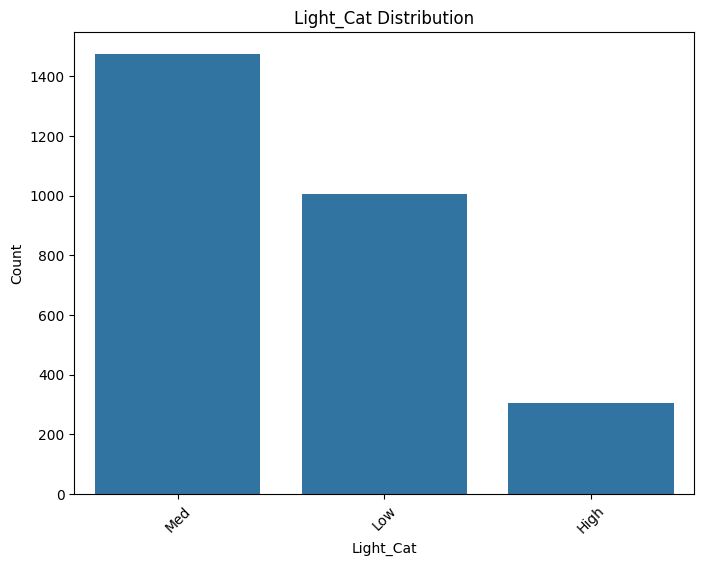

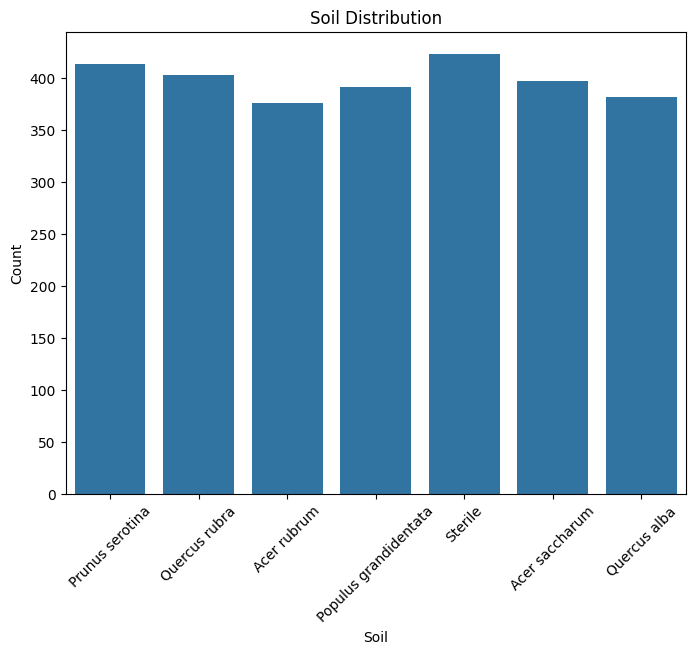

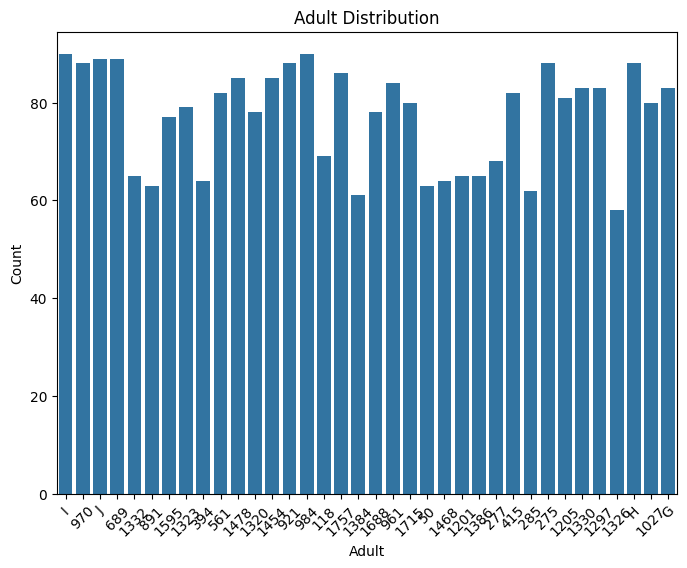

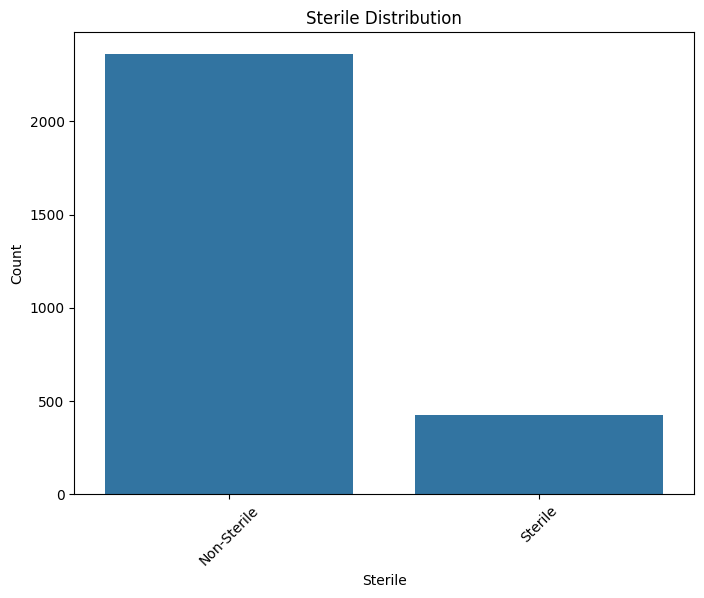

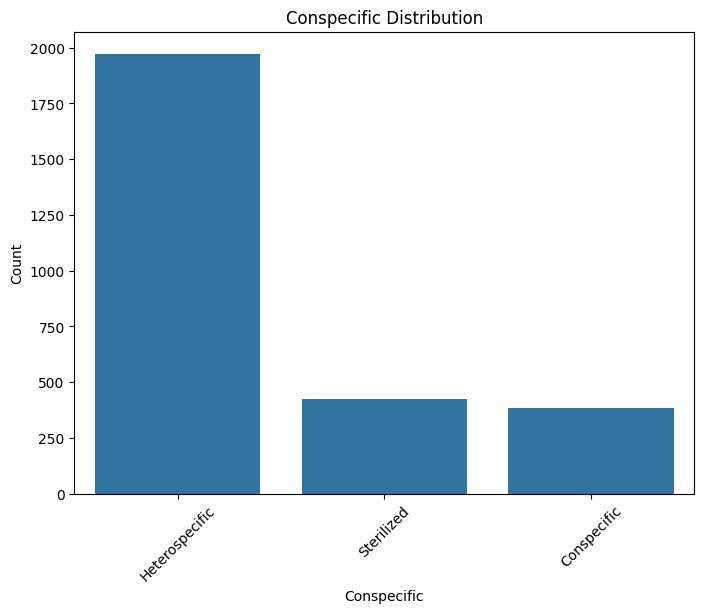

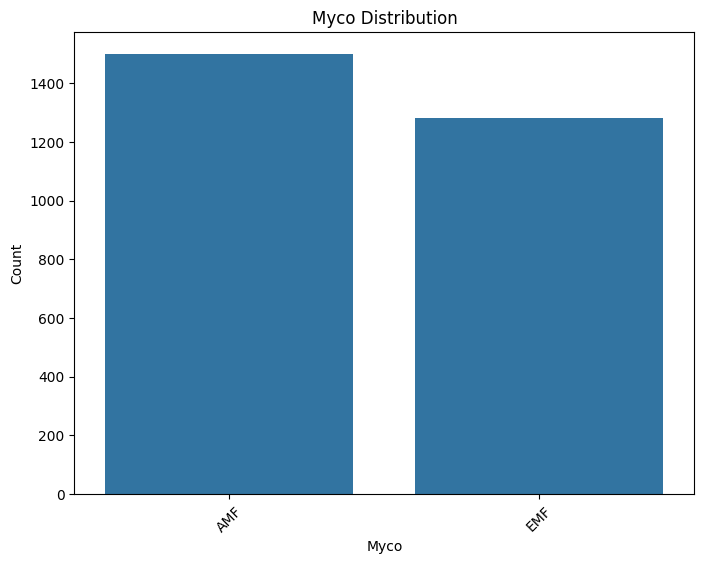

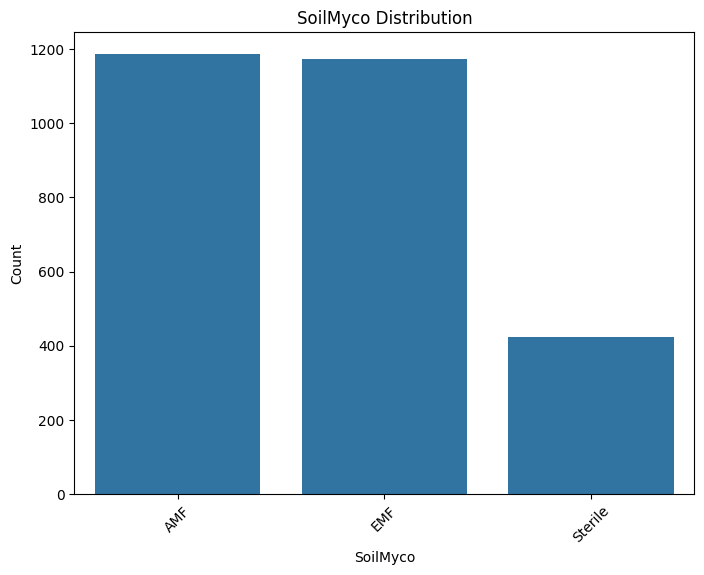

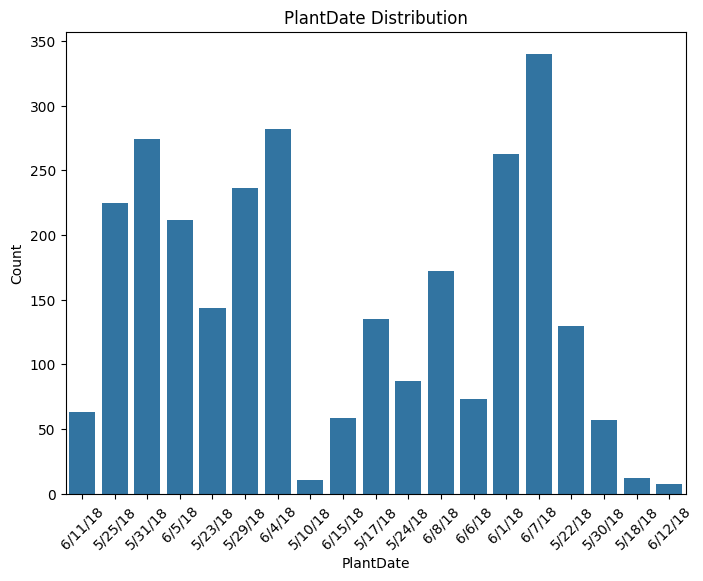

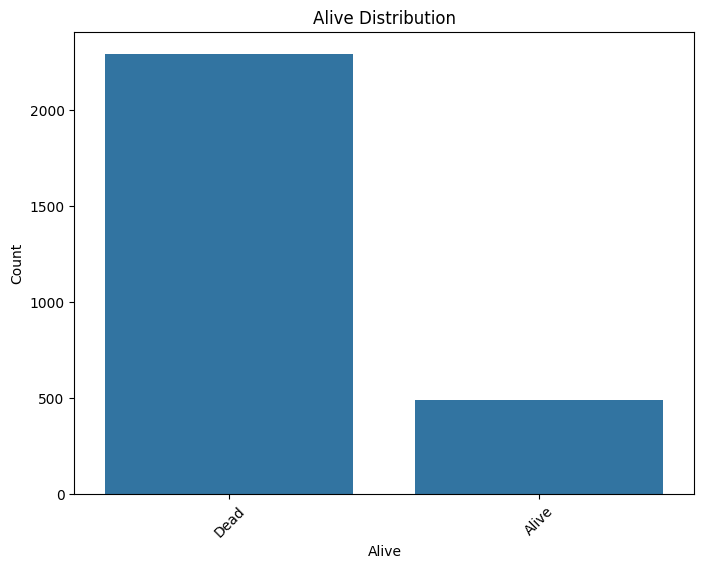

In [11]:
for column in categorical_columns:
    plt.figure(figsize = (8, 6))
    sns.countplot(x = column, data = tree)
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [12]:
categorical_columns = tree.select_dtypes(include=['object']).columns

contingency_tables = {}
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(tree[col1], tree[col2])
            contingency_tables[(col1, col2)] = contingency_table

chi2_results = {}
for key, contingency_table in contingency_tables.items():
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi2_results[key] = (chi2, p)

In [13]:
significant_plots_count = 0
for ((col1, col2), (chi2, p_value)) in chi2_results.items():
    if p_value < 0.05:
        significant_plots_count += 1
        print(f"Chi-square test between {col1} and {col2}:")
        print(f"  Chi-square statistic: {chi2:.2f}")
        print(f"  p-value: {p_value:.4f}")
    if significant_plots_count >= 9:  # Stop printing results after 9 significant plots
        break

Chi-square test between Subplot and Light_Cat:
  Chi-square statistic: 81.12
  p-value: 0.0000
Chi-square test between Subplot and PlantDate:
  Chi-square statistic: 93.95
  p-value: 0.0423
Chi-square test between Species and Adult:
  Chi-square statistic: 261.40
  p-value: 0.0000
Chi-square test between Species and Myco:
  Chi-square statistic: 2783.00
  p-value: 0.0000
Chi-square test between Species and PlantDate:
  Chi-square statistic: 6632.07
  p-value: 0.0000
Chi-square test between Species and Alive:
  Chi-square statistic: 595.27
  p-value: 0.0000
Chi-square test between Light_Cat and Subplot:
  Chi-square statistic: 81.12
  p-value: 0.0000
Chi-square test between Light_Cat and PlantDate:
  Chi-square statistic: 148.72
  p-value: 0.0000
Chi-square test between Soil and Adult:
  Chi-square statistic: 12164.61
  p-value: 0.0000


In [14]:
tree.to_csv('tree.csv')